<a href="https://colab.research.google.com/github/mehmettirpan/Colab_Machine_Learning/blob/main/stock_market_forecasting_aapl_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Apple Stock Market Forecasting**


### Kullanacağımız bazı ingilizce kelimelerin anlamları
* Değişkenlerin tamamını global olması adına ingillizce hazırladık.
* Buna bağlı olarak tablolardaki terimler de ingilizce olmalıydı bu terimlerin türkçe karşılıkları şöyle;
* * target -> Hedef
* * subset -> altküme
* * train -> eğitim (eğitim kısmında sık kullandık)
* * validation -> doğrulama
* * sequential -> sıralı - ardışık
* * prediction -> tahmin
* * observation -> gözlem - training observations -> eğitim gözlemleri


# Adımlar

### Veri toplama temizleme ve işleme adımları;
* Bu adımları tek seferde yaptık çünkü veriyi ben kednim hazırlayıp imort ettim yahoofinace' dan. Bu yüzden eksik ya da yanlış bir veri yok çünkü verinin kaynağı ben olduğum için yüklemeden önce test etmiştim

In [11]:
import pandas as pd  #dosyadan verileri(DataFrame) almak için lazım
df = pd.read_csv('/content/AAPL.csv') # AAPL dosyasının konumunu girerek bulunduğu konumdan verilerini çekktik daha doğrusu okuduk
df #df'i yazdırdık

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...,...
10802,2023-10-18,175.580002,177.580002,175.110001,175.839996,175.839996,54764400
10803,2023-10-19,176.039993,177.839996,175.190002,175.460007,175.460007,59302900
10804,2023-10-20,175.309998,175.419998,172.639999,172.880005,172.880005,64189300
10805,2023-10-23,170.910004,174.009995,169.929993,173.000000,173.000000,55980100


* Bizim için gerekli olan veri tablosunu aldık kullanmayacağımız veriyi tablodan çıkarttık

In [12]:
df = df[['Date', 'Close']]
#DataFrame in zaman ve kapanış değerlerine odaklanacak şekilde tabloyu ayarladık
df

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
10802,2023-10-18,175.839996
10803,2023-10-19,175.460007
10804,2023-10-20,172.880005
10805,2023-10-23,173.000000


In [13]:
df['Date'] #DataFrame in zaman kısmı için olan bölümünün çıktısını aldık

0        1980-12-12
1        1980-12-15
2        1980-12-16
3        1980-12-17
4        1980-12-18
            ...    
10802    2023-10-18
10803    2023-10-19
10804    2023-10-20
10805    2023-10-23
10806    2023-10-24
Name: Date, Length: 10807, dtype: object

* İlerleyen adımlarda zaman verisini kullanacağımız için zamanı ayırıp işleyebileceğimiz bir formata çevirdik. Yani string olarak olan formatı tarih formatına dönüştürdük

In [14]:
import datetime

# Tarih dizisini datetime nesnesine dönüştüren işlev
def str_to_datetime(s):
    split = s.split('-')  # Tarih dizisini parçalara ayırır
    year, month, day = int(split[0]), int(split[1]), int(split[2])  # Yıl, ay ve gün bilgilerini ayırır
    #split[0] sıfırıncı yani ilk değeri dönderecek olupn yanına tire (-) işareti koyuyor
    return datetime.datetime(year=year, month=month, day=day)  # datetime nesnesi oluşturup döndürür

# Örnek kullanım
datetime_object = str_to_datetime('1980-12-12')  # '1980-12-12' tarih dizisini datetime nesnesine dönüştürür
datetime_object

datetime.datetime(1980, 12, 12, 0, 0)

In [15]:
df # Tekrardan çıktı alıp sağlamasını yapıyoruz

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
10802,2023-10-18,175.839996
10803,2023-10-19,175.460007
10804,2023-10-20,172.880005
10805,2023-10-23,173.000000


In [16]:
df['Date'] = df['Date'].apply(str_to_datetime)
# yukarıda 'Date' sütununu aldık string değerlerini tarih anlamı taşıyan yani sadece harf olmayan anlamlara dönüştürdük
df['Date']  # çıktısını aldık

<ipython-input-16-d0f4b91f68d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0       1980-12-12
1       1980-12-15
2       1980-12-16
3       1980-12-17
4       1980-12-18
           ...    
10802   2023-10-18
10803   2023-10-19
10804   2023-10-20
10805   2023-10-23
10806   2023-10-24
Name: Date, Length: 10807, dtype: datetime64[ns]

In [17]:
df.index = df.pop('Date') # Daha sonra verilerin analizini yaparken bu değerleri indeksleme amacıyla kullanmak için Date sütununu diziye dönüştürdük
df

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2023-10-18,175.839996
2023-10-19,175.460007
2023-10-20,172.880005


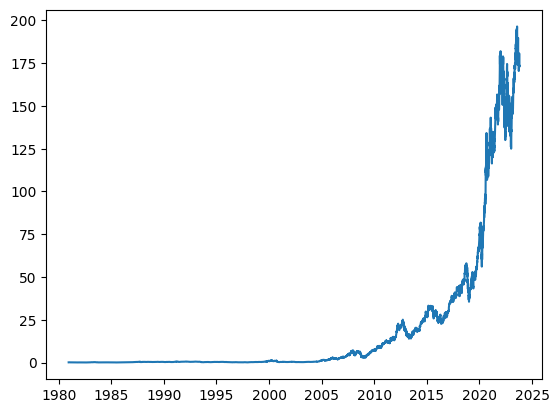

In [18]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close']) #burada indeks olarak atadığımız date değerlerine karşılık gelen Close değerlerinden bir çizgi grafiği oluşturduk

### Başlangıç tarihi ve bitiş tarihi arasındaki zaman serisini işleyerek belirlediğimiz bir pencere boyutunda DataFrame oluşturan kod parçacığı.

Bu kodun temel amacı, belirli bir başlangıç ve bitiş tarihine sahip bir DataFrame içindeki zaman serisini işlemek ve her pencere için geçmiş verilere dayalı özellikler ve hedef değerler oluşturmaktır. Bu, gelecekteki bir tarihteki hedef değerlerin, geçmişteki belirli bir pencere boyutundaki verilere dayalı olarak tahmin edilmesine olanak tanır.

In [19]:
import numpy as np
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    # Başlangıç ve bitiş tarihlerini datetime nesnelerine dönüştür
    first_date, last_date = pd.to_datetime(first_date_str), pd.to_datetime(last_date_str)
    target_date = first_date

    # Belirtilen tarih aralığındaki tarihleri içeren bir dizi oluştur
    dates = pd.date_range(start=target_date, end=last_date)

    # Özellik (X) ve hedef değer (Y) için boş NumPy dizileri oluştur
    X = np.zeros((len(dates), n))
    Y = np.zeros(len(dates))

    # Her bir tarih için
    for i, target_date in enumerate(dates):
        # Belirtilen tarih kadar olan veri alt kümesini al
        df_subset = dataframe.loc[:target_date].tail(n + 1)

        # Hata kontrolü: Alt küme boyutu n+1'e eşit değilse hata mesajı ver
        if len(df_subset) != n + 1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        # 'Close' sütunundaki değerleri numpy dizisine dönüştür
        values = df_subset['Close'].to_numpy()

        # Özellik matrisine (X) ve hedef değer dizisine (Y) değerleri ata
        X[i, :] = values[:-1]
        Y[i] = values[-1]

    # Oluşturulan veri setini DataFrame'e dönüştür
    ret_df = pd.DataFrame({'Target Date': dates})
    for i in range(n):
        ret_df[f'Target-{n-i}'] = X[:, i]
    ret_df['Target'] = Y

    # DataFrame'i döndür
    return ret_df

# Örnek kullanım
windowed_df = df_to_windowed_df(df, '2018-03-25', '2023-03-23', n=3)
print(windowed_df)


     Target Date    Target-3    Target-2    Target-1      Target
0     2018-03-25   43.810001   42.817501   42.212502   41.235001
1     2018-03-26   42.817501   42.212502   41.235001   43.192501
2     2018-03-27   42.212502   41.235001   43.192501   42.084999
3     2018-03-28   41.235001   43.192501   42.084999   41.619999
4     2018-03-29   43.192501   42.084999   41.619999   41.945000
...          ...         ...         ...         ...         ...
1820  2023-03-19  152.589996  152.990005  155.850006  155.000000
1821  2023-03-20  152.990005  155.850006  155.000000  157.399994
1822  2023-03-21  155.850006  155.000000  157.399994  159.279999
1823  2023-03-22  155.000000  157.399994  159.279999  157.830002
1824  2023-03-23  157.399994  159.279999  157.830002  158.929993

[1825 rows x 5 columns]


## Bu fonksiyon, yukarıda oluşturduğumuz DataFrame'i tarih, girdi ve hedef veri setlerine ayırır ve boyutlarını döndürür.

In [20]:
def windowed_df_to_date_X_y(windowed_dataframe):
  # DataFrame'ı Numpy dizisine dönüştür
  df_as_np = windowed_dataframe.to_numpy()

  # Tarihleri al
  dates = df_as_np[:, 0]

  # Girdi matrisini oluştur
  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  # Hedef sütununu al
  Y = df_as_np[:, -1]

  # Tarihleri, girdileri (X) ve hedefleri (Y) döndür
  return dates, X.astype(np.float32), Y.astype(np.float32)

# Verilen pencere boyutundaki DataFrame'i tarih, girdi ve hedef veri setlerine ayır ve boyutlarını döndür
dates, X, y = windowed_df_to_date_X_y(windowed_df)

# Tarihlerin, girdilerin ve hedeflerin boyutlarını göster
dates.shape, X.shape, y.shape


((1825,), (1825, 3, 1), (1825,))

### Bu kod parçası, veri setini eğitim, doğrulama ve test setlerine bölmek için indeksleri belirler ve her bir veri setini oluşturur.

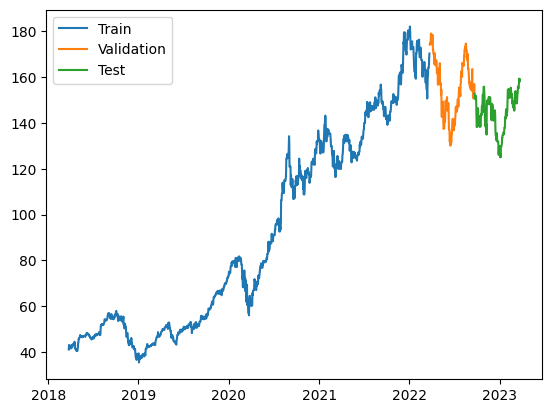

In [21]:
# Veri setini eğitim, doğrulama ve test setlerine bölmek için indeksleri belirle
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

# Eğitim veri setini oluştur
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

# Doğrulama veri setini oluştur
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

# Test veri setini oluştur
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

# Her bir veri setinin hedef değerlerini tarihlerine bağlı olarak çizdir
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

# Çizimlerin neyi temsil ettiğini belirle
plt.legend(['Train', 'Validation', 'Test'])

###Bu kısım, tensorflow.keras kütüphanesi kullanılarak bir LSTM modeli oluşturur, derler ve eğitir.

In [22]:
from tensorflow.keras.models import Sequential #Sequential sınıfı, bir modelin sıralı bir şekilde birbirine bağlı katmanlardan oluşmasını sağlar.
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# Model oluşturma ve tanımlama
model = Sequential([layers.Input((3, 1)),  # Giriş katmanı boyutunu belirt (3, 1)
                    layers.LSTM(64),  # 64 hücreye sahip bir LSTM katmanı ekle
                    layers.Dense(32, activation='relu'),  # 32 nöronlu, ReLU aktivasyonlu bir yoğun katman ekle
                    layers.Dense(32, activation='relu'),  # 32 nöronlu, ReLU aktivasyonlu bir yoğun katman daha ekle
                    layers.Dense(1)])  # 1 nöronlu çıkış katmanı ekle

# Modelin derlenmesi
model.compile(loss='mse',  # Kayıp fonksiyonu olarak ortalama karesel hata (MSE) kullan
              optimizer=Adam(learning_rate=0.001),  # Optimizasyon için Adam optimize edici kullan ve öğrenme hızını 0.001 olarak belirle
              metrics=['mean_absolute_error'])  # İzlenecek metrik olarak ortalama mutlak hata (MAE) seç

# Modelin eğitilmesi
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)  # Modeli eğitmek için eğitim ve doğrulama veri setlerini kullan, 100 epoch boyunca eğitim yap



Epoch 1/100
46/46 [==============================] - 5s 24ms/step - loss: 9681.2510 - mean_absolute_error: 88.2354 - val_loss: 22502.7500 - val_mean_absolute_error: 149.4960
Epoch 2/100
46/46 [==============================] - 0s 6ms/step - loss: 7255.9614 - mean_absolute_error: 72.0684 - val_loss: 13970.4619 - val_mean_absolute_error: 117.5295
Epoch 3/100
46/46 [==============================] - 0s 5ms/step - loss: 2685.1121 - mean_absolute_error: 40.7596 - val_loss: 4158.2563 - val_mean_absolute_error: 63.2996
Epoch 4/100
46/46 [==============================] - 0s 5ms/step - loss: 1289.0253 - mean_absolute_error: 30.2135 - val_loss: 1768.8269 - val_mean_absolute_error: 40.3268
Epoch 5/100
46/46 [==============================] - 0s 5ms/step - loss: 137.4073 - mean_absolute_error: 5.7313 - val_loss: 133.7083 - val_mean_absolute_error: 9.0062
Epoch 6/100
46/46 [==============================] - 0s 5ms/step - loss: 20.4235 - mean_absolute_error: 2.4384 - val_loss: 36.5980 - val_mean_ab

Bu kod, eğitim veri seti üzerindeki tahminlerin ve gerçek gözlemlerin bir çizgi grafiği üzerinde gösterilmesini sağlar.

46/46 [==============================] - 1s 2ms/step


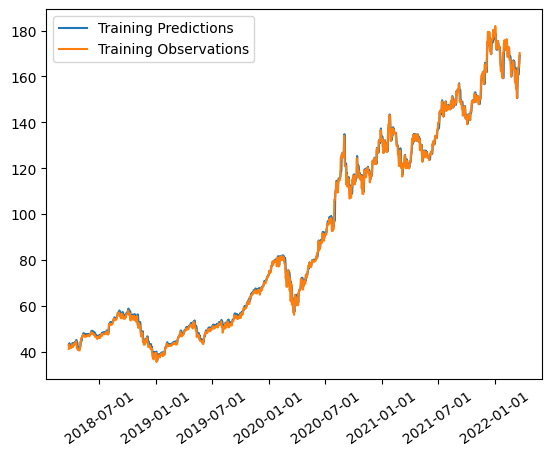

In [23]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Grafiği oluştur
fig, ax = plt.subplots()

# Model üzerinde eğitim veri seti (X_train) üzerinde tahminleme yap
train_predictions = model.predict(X_train).flatten()

# Eğitim tarihlerine karşılık gelen tahminleri ve gerçek değerleri içeren bir çizgi grafiği oluştur
ax.plot(dates_train, train_predictions, label='Training Predictions')
ax.plot(dates_train, y_train, label='Training Observations')

# X ekseni tarih formatını düzenleme
date_format = DateFormatter("%Y-%m-%d")  # İstediğiniz tarih formatını belirleyin yani şöyle %Y dört haneli yıl formatı, %m 2 haneli ay formatı ve %d 2 haneli olarak gün formatını belirlemiş olur
ax.xaxis.set_major_formatter(date_format)

# X ekseni etiketlerini döndürme
plt.xticks(rotation=35)  # İhtiyaca göre döndürme açısını ayarlayabilirsiniz

# Grafiğe açıklama ekle
plt.legend()

# Grafiği göster
plt.show()


Bu kod, doğrulama veri seti üzerindeki tahminlerin ve gerçek gözlemlerin bir çizgi grafiği üzerinde gösterilmesini sağlar.

6/6 [==============================] - 0s 3ms/step


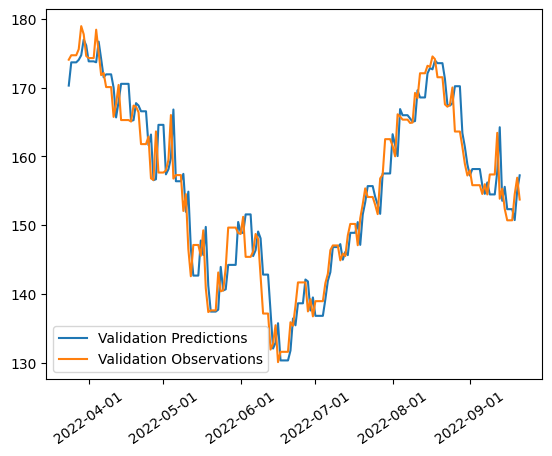

In [24]:
# Grafiği oluştur
fig, ax = plt.subplots()

val_predictions = model.predict(X_val).flatten() #modelin doğrulama veri seti (X_val) üzerinde tahminler yapmasını sağlar. flatten() fonksiyonu, tahminlerin boyutunu düzleştirir.

# Doğrulama tarihlerine karşılık gelen tahminleri ve gerçek değerleri içeren bir çizgi grafiği oluştur
ax.plot(dates_val, val_predictions, label='Validation Predictions')
ax.plot(dates_val, y_val, label='Validation Observations')

# X ekseni tarih formatını düzenleme
date_format = DateFormatter("%Y-%m-%d")  # İstediğiniz tarih formatını belirleyin
ax.xaxis.set_major_formatter(date_format)

# X ekseni etiketlerini döndürme
plt.xticks(rotation=35)  # İhtiyaca göre döndürme açısını ayarlayabilirsiniz

# Grafiğe açıklama ekle
plt.legend()

# Grafiği göster
plt.show()


Bu kod, test veri seti üzerindeki tahminlerin ve gerçek gözlemlerin bir çizgi grafiği üzerinde gösterilmesini sağlar.

6/6 [==============================] - 0s 3ms/step


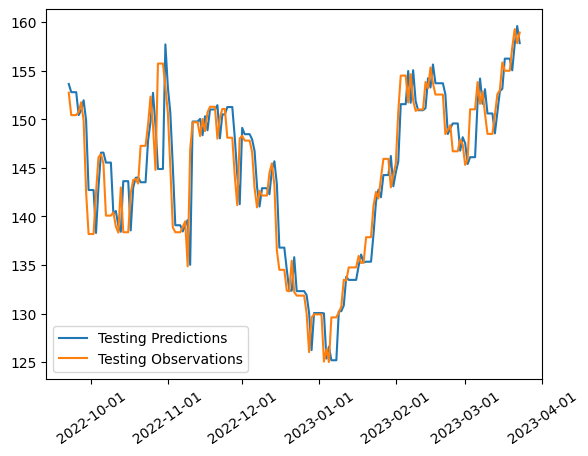

In [25]:
# Grafiği oluştur
fig, ax = plt.subplots()

# Model üzerinde test veri seti (X_test) üzerinde tahminleme yap
test_predictions = model.predict(X_test).flatten()

# Test tarihlerine karşılık gelen tahminleri ve gerçek değerleri içeren bir çizgi grafiği oluştur
ax.plot(dates_test, test_predictions, label='Testing Predictions')
ax.plot(dates_test, y_test, label='Testing Observations')

# X ekseni tarih formatını düzenleme
date_format = DateFormatter("%Y-%m-%d")  # İstediğiniz tarih formatını belirleyin
ax.xaxis.set_major_formatter(date_format)

# X ekseni etiketlerini döndürme
plt.xticks(rotation=35)  # İhtiyaca göre döndürme açısını ayarlayabilirsiniz

# Grafiğe açıklama ekle
plt.legend()

# Grafiği göster
plt.show()



* Bu kod, farklı veri setleri üzerinde yapılan tahminlerin ve gerçek gözlemlerin görselleştirilmesini sağlar.

* Bu satır, eğitim verileri ile modelin eğittiği ve tahmin yaptığı verileri aynı grafik üzerinde karşılaştırmak için kullanılır. Böylece gerçek verilere modelin ne kadar yakın tahminler yaptığını görmek mümkün olur.

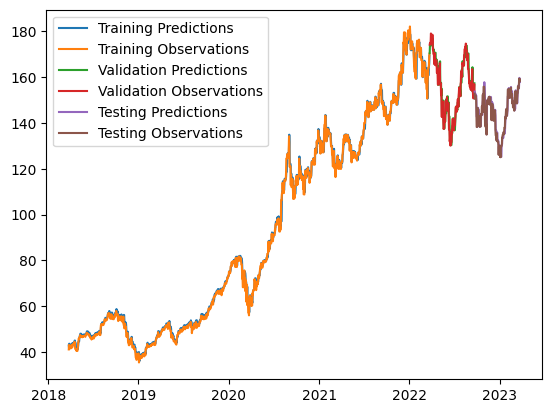

In [26]:
plt.plot(dates_train, train_predictions) # eğitim veri seti için yapılan tahminleri görselleştirir.
plt.plot(dates_train, y_train) # eğitim veri seti için gerçek gözlemleri görselleştirir.
plt.plot(dates_val, val_predictions) # doğrulama veri seti için yapılan tahminleri görselleştirir.
plt.plot(dates_val, y_val) # doğrulama veri seti için gerçek gözlemleri görselleştirir.
plt.plot(dates_test, test_predictions) # test veri seti için yapılan tahminleri görselleştirir.
plt.plot(dates_test, y_test) # test veri seti için gerçek gözlemleri görselleştirir.
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [27]:
from sklearn.metrics import r2_score

r2 = r2_score(y_val, val_predictions)
r2

0.9177222375015259

In [28]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, test_predictions)
r2

0.8465221800113427